In [58]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [13]:
class Model(nn.Module):

    # input layer four feature of the flower,    
    #    1. sepal length in cm
    #    2. sepal width in cm
    #    3. petal length in cm
    #    4. petal width in cm
    # Hidden Layer one (some number of neurons)
    # H2
    # output 3 classes of iris flowers
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
        

In [14]:
torch.manual_seed(42)

In [15]:
model = Model()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
my_df = pd.read_csv("/Users/benjamin/Downloads/iris/iris.data", header=None)

In [42]:
# change last column from string to int
my_df.iloc[:,4] = my_df.iloc[:,4].replace("Iris-virginica", 2)



In [53]:
X = my_df.drop(columns=4, axis=1)
y = my_df.iloc[:,4]

In [54]:
# convert to numpy array
X = X.values
y = y.values


In [56]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [73]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [74]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [75]:
# Set the criterian of the model to measure the error
criterian = nn.CrossEntropyLoss()

In [76]:
# Choose the optimizer, Adam, 
# lr = learning rate, if error doesn't go down for certain iteration, we want to lower our leanring rate
# the lower the lr, the longer the training will go
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [81]:
# Train the model, ? Epochs (one run through all the layers)
epochs = 100
losses = []
for i in range(epochs):
    # forward and get a prediction
    y_pred = model.forward(X_train)
    
    # Measure the loss/error
    loss = criterian(y_pred, y_train) # predict vs train values
    
    # Keep track of the losses
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        print(f"loss: {loss}")
    
    # backward propagation, take the error rate of the forward pass and feed it backward
    # through the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss: 0.01781202293932438
loss: 0.01605837792158127
loss: 0.015622932463884354
loss: 0.015120760537683964
loss: 0.014668306335806847
loss: 0.014293191023170948
loss: 0.013918575830757618
loss: 0.013561418280005455
loss: 0.013212700374424458
loss: 0.012872869148850441


Text(0.5, 0, 'Epoch')

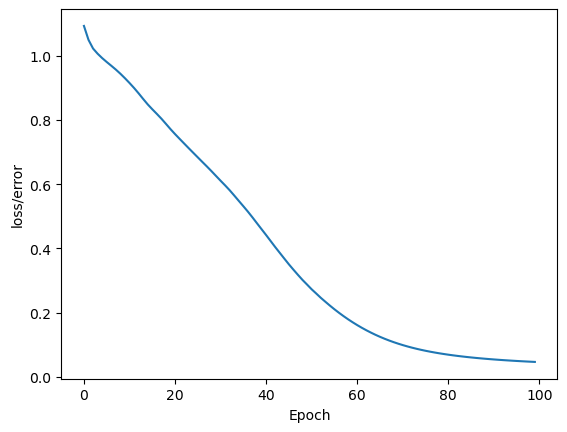

In [79]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [82]:
# validate model on test data
with torch.no_grad():   # turn off back propogation
    y_eval = model.forward(X_test)
    loss = criterian(y_eval, y_test)

In [83]:
loss

tensor(0.2117)

In [92]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data) 
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct!')

1.) tensor([-7.4703,  5.0129, 11.3260]) 	 2 	 2
2.) tensor([-12.8838,  -0.3069,  18.8986]) 	 2 	 2
3.) tensor([-13.4980,   1.2475,  19.8060]) 	 2 	 2
4.) tensor([-0.8108, 11.9943,  2.3393]) 	 1 	 1
5.) tensor([-10.2906,   3.2802,  15.3231]) 	 2 	 2
6.) tensor([ 1.3735e+00,  1.1217e+01, -8.7976e-03]) 	 1 	 1
7.) tensor([-6.4471,  6.5799,  9.9555]) 	 2 	 2
8.) tensor([-0.5581, 11.8839,  2.0661]) 	 1 	 1
9.) tensor([-8.2842,  4.9833, 12.5281]) 	 2 	 2
10.) tensor([-13.7480,  -0.4455,  20.1316]) 	 2 	 2
11.) tensor([-5.6765,  7.2918,  8.8885]) 	 2 	 2
12.) tensor([ 14.9946,   6.8216, -14.6155]) 	 0 	 0
13.) tensor([ 13.5076,   6.0716, -13.1189]) 	 0 	 0
14.) tensor([ 2.6005,  9.1569, -1.4573]) 	 1 	 1
15.) tensor([ 13.3501,   6.9201, -12.8864]) 	 0 	 0
16.) tensor([-4.6969,  8.9701,  7.5050]) 	 2 	 1
17.) tensor([ 14.1144,   6.3776, -13.7296]) 	 0 	 0
18.) tensor([-6.8080,  5.9910, 10.4274]) 	 1 	 2
19.) tensor([ 14.4939,   6.5690, -14.1115]) 	 0 	 0
20.) tensor([ 12.5052,   5.7999, -12.09